In [9]:
pip uninstall trdg -y 

Found existing installation: trdg 1.8.0
Uninstalling trdg-1.8.0:
  Successfully uninstalled trdg-1.8.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --no-deps -e ./

Obtaining file:///mnt/g/ml_projects/ocr/TextRecognitionDataGenerator
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of trdg==1.8.0 from file:///mnt/g/ml_projects/ocr/TextRecognitionDataGenerator (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for trdg
Note: you may need to restart the kernel to use updated packages.


In [1]:
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)
import glob
import numpy as np
from matplotlib import pyplot as plt
import random 
import tqdm
from concurrent.futures import ThreadPoolExecutor
import os

2025-08-13 23:21:59.220223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755116519.236419    1846 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755116519.241398    1846 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755116519.254959    1846 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755116519.254986    1846 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755116519.254988    1846 computation_placer.cc:177] computation placer alr

Missing modules for handwritten text generation.


In [4]:
import glob
assert len(glob.glob('./fonts/*/*.*')) == 223

In [5]:
from trdg.generators import GeneratorFromWikipedia
GeneratorFromWikipedia?

Init signature:
GeneratorFromWikipedia(
    count: int = -1,
    minimum_length: int = 1,
    fonts: List[str] = [],
    language: str = 'en',
    size: int = 32,
    skewing_angle: int = 0,
    random_skew: bool = False,
    blur: int = 0,
    random_blur: bool = False,
    background_type: int = 0,
    distorsion_type: int = 0,
    distorsion_orientation: int = 0,
    is_handwritten: bool = False,
    width: int = -1,
    alignment: int = 1,
    text_color: str = '#282828',
    orientation: int = 0,
    space_width: float = 1.0,
    character_spacing: int = 0,
    margins: Tuple[int, int, int, int] = (5, 5, 5, 5),
    fit: bool = False,
    output_mask: bool = False,
    word_split: bool = False,
    image_dir: str = '/mnt/g/ml_projects/ocr/TextRecognitionDataGenerator/trdg/generators/images',
    stroke_width: int = 0,
    stroke_fill: str = '#282828',
    image_mode: str = 'RGB',
    output_bboxes: int = 0,
    rtl: bool = False,
)
Docstring:      Generator that uses sentences take

In [2]:
row_idx = 0

In [3]:
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)
import glob
import numpy as np
from matplotlib import pyplot as plt
import random 
import tqdm
from concurrent.futures import ThreadPoolExecutor
import os

def save_image_and_label(img, label, filename_base):
    img.save(f"{filename_base}.jpg")
    with open(f"{filename_base}.txt", "w", encoding="utf-8") as f:
        f.write(label)

        
executor = ThreadPoolExecutor(max_workers=16)


font_list = glob.glob('./fonts/*/*.*')


print('loading fonts and text')
generator = GeneratorFromStrings(
    # ['בדיקה אחד שתיים שלוש', 'בדיקה אחד שתיים שלוש', 'בדיקה אחד שתיים שלוש'],
    # [row['translation1'], row['translation2']], 
    list(ds['train']['translation1'])[0:10000],
    size=128,
    skewing_angle=3,
    random_skew=True,
    blur=1,
    random_blur=True,
    fonts = font_list,
    rtl=True, 
    language="he",
    margins=(25, 25, 25, 25),
)

print('generating')

counter = 0
for img, lbl in tqdm.tqdm(generator):
    if img:
        # executor.submit(img.save(f"./dataset_0/{row_idx:0{12}d}_part_1.jpg"))

        filename_base = f"./dataset_0/{row_idx:0{12}d}_part_2"
        executor.submit(save_image_and_label, img, lbl, filename_base)
        
        

    row_idx += 1
    counter += 1
    if counter == 10000:
        break

    

executor.shutdown()  # Ensure all saves finish


loading fonts and text


NameError: name 'ds' is not defined

In [4]:
lbl

NameError: name 'lbl' is not defined

In [116]:
executor.shutdown()  # Ensure all saves finish

In [113]:
len()

300150

In [108]:
ds['train'][2]

{'original_annotator_labels': "['entailment']",
 'genre': 'government',
 'original_label': 'entailment',
 'pairID': '63601e',
 'promptID': 63601,
 'sentence1': 'As agreed with the participants, the purpose of the discussion was not to reach a consensus, but rather to engage in an open, no attribution-based dialogue.',
 'translation1': 'כפי שסוכם עם המשתתפים, מטרת הדיון לא הייתה להגיע לקונצנזוס, אלא לעסוק בדיאלוג פתוח ללא ייחוס.',
 'sentence2': 'An agreement was made with participants to ensure that the discussion would involve open dialogue.',
 'translation2': 'הוסכם עם המשתתפים לוודא שהדיון יכלול שיח פתוח.',
 'hebrew_label': None}

In [104]:
len(ds['train'])

300150

In [1]:
pip uninstall trdg -y

Found existing installation: trdg 1.8.0
Uninstalling trdg-1.8.0:
  Successfully uninstalled trdg-1.8.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --no-deps -e ./

Obtaining file:///mnt/g/ml_projects/ocr/TextRecognitionDataGenerator
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of trdg==1.8.0 from file:///mnt/g/ml_projects/ocr/TextRecognitionDataGenerator (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for trdg
Note: you may need to restart the kernel to use updated packages.


# tasks
- longer text that makes sense
- drop line (both in img and lbl)
- english --> skip + keep (2 versions)
- handwriting only dataset

['./fonts/alefalefalef/DanaYadAlefAlefAlef-Normal.otf']
./fonts/alefalefalef/DanaYadAlefAlefAlef-Normal.otf
הלידגה ןומרוהל םינטלוקב םגפ בקע ,הלידגה ןומרוהב לופיטל ביגמ ונניאש ,-1-ב רסוח בקע תודמג לש רידנ גוס איה ("ןורל םש לע תוסננה") ןורל תנומסת


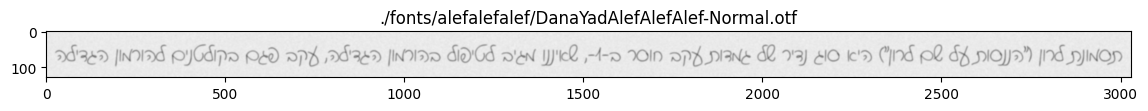

['./fonts/alefalefalef/GveretLevinAlefAlefAlef-Regular.otf']
./fonts/alefalefalef/GveretLevinAlefAlefAlef-Regular.otf
.הקוסעתו םידומילמ םיקתונמ םיבשחנ רשא ,17–13 ינב רעונ ינבל סחייתמה ךוניחה םוחתמ גשומ אוה קתונמ רעונ םוקיש


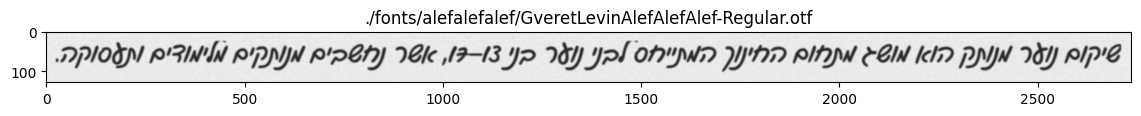

['./fonts/alefalefalef/heshbon-bold-alefalefalef.otf']
./fonts/alefalefalef/heshbon-bold-alefalefalef.otf
תיתוברת וא תירוטסיה תובישח ילעב דנלטוקס ישנא לש תואנקויד תגצהב החמתמו ורובנידאב אצמנה ,תונמאל ןואיזומ איה (     :תילגנאב) דנלטוקס לש תימואלה תואנקוידה תיירלג


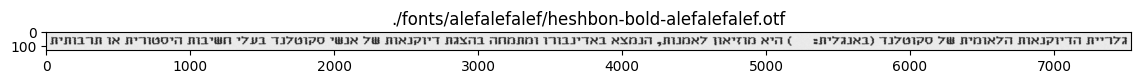

In [3]:
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)
import glob
import numpy as np
from matplotlib import pyplot as plt

font_list = glob.glob('./fonts/*/*.*')[0:3]
for i in range(len(font_list)):
    print([font_list[i]])
    generator = GeneratorFromWikipedia(
        # ['בדיקה אחד שתיים שלוש'],
        minimum_length=5,
        size=128,
        random_skew=True,
        blur=2,
        random_blur=True,
        fonts = [font_list[i]],
        rtl=True, 
        language="he",
        margins=(25, 25, 25, 25),
    )
    
    for img, lbl in generator:
        # if img:
        #     img.save("with-rtl.png")
        plt.figure(figsize=(14,14))
        plt.title(font_list[i])
        print(font_list[i])
        print(lbl)
        plt.imshow(np.array(img))
        plt.show()
        break 

In [4]:
lbl

'תיתוברת וא תירוטסיה תובישח ילעב דנלטוקס ישנא לש תואנקויד תגצהב החמתמו ורובנידאב אצמנה ,תונמאל ןואיזומ איה (     :תילגנאב) דנלטוקס לש תימואלה תואנקוידה תיירלג'

In [7]:
GeneratorFromWikipedia?

Init signature:
GeneratorFromWikipedia(
    count: int = -1,
    minimum_length: int = 1,
    fonts: List[str] = [],
    language: str = 'en',
    size: int = 32,
    skewing_angle: int = 0,
    random_skew: bool = False,
    blur: int = 0,
    random_blur: bool = False,
    background_type: int = 0,
    distorsion_type: int = 0,
    distorsion_orientation: int = 0,
    is_handwritten: bool = False,
    width: int = -1,
    alignment: int = 1,
    text_color: str = '#282828',
    orientation: int = 0,
    space_width: float = 1.0,
    character_spacing: int = 0,
    margins: Tuple[int, int, int, int] = (5, 5, 5, 5),
    fit: bool = False,
    output_mask: bool = False,
    word_split: bool = False,
    image_dir: str = '/mnt/g/ml_projects/ocr/TextRecognitionDataGenerator/trdg/generators/images',
    stroke_width: int = 0,
    stroke_fill: str = '#282828',
    image_mode: str = 'RGB',
    output_bboxes: int = 0,
    rtl: bool = False,
)
Docstring:      Generator that uses sentences take

In [3]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.7 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 26.7 MB/s  0:00:00
Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [8]:
len(glob.glob('./fonts/*/*.*'))

224

In [10]:
GeneratorFromStrings?

Init signature:
GeneratorFromStrings(
    strings: List[str],
    count: int = -1,
    fonts: List[str] = [],
    language: str = 'en',
    size: int = 32,
    skewing_angle: int = 0,
    random_skew: bool = False,
    blur: int = 0,
    random_blur: bool = False,
    background_type: int = 0,
    distorsion_type: int = 0,
    distorsion_orientation: int = 0,
    is_handwritten: bool = False,
    width: int = -1,
    alignment: int = 1,
    text_color: str = '#282828',
    orientation: int = 0,
    space_width: float = 1.0,
    character_spacing: int = 0,
    margins: Tuple[int, int, int, int] = (5, 5, 5, 5),
    fit: bool = False,
    output_mask: bool = False,
    word_split: bool = False,
    image_dir: str = '/mnt/g/ml_projects/ocr/TextRecognitionDataGenerator/trdg/generators/images',
    stroke_width: int = 0,
    stroke_fill: str = '#282828',
    image_mode: str = 'RGB',
    output_bboxes: int = 0,
    rtl: bool = False,
)
Docstring:      Generator that uses a given list of strin

ERROR! Session/line number was not unique in database. History logging moved to new session 1169


In [21]:
GeneratorFromStrings?

Init signature:
GeneratorFromStrings(
    strings: List[str],
    count: int = -1,
    fonts: List[str] = [],
    language: str = 'en',
    size: int = 32,
    skewing_angle: int = 0,
    random_skew: bool = False,
    blur: int = 0,
    random_blur: bool = False,
    background_type: int = 0,
    distorsion_type: int = 0,
    distorsion_orientation: int = 0,
    is_handwritten: bool = False,
    width: int = -1,
    alignment: int = 1,
    text_color: str = '#282828',
    orientation: int = 0,
    space_width: float = 1.0,
    character_spacing: int = 0,
    margins: Tuple[int, int, int, int] = (5, 5, 5, 5),
    fit: bool = False,
    output_mask: bool = False,
    word_split: bool = False,
    image_dir: str = '/mnt/g/ml_projects/ocr/TextRecognitionDataGenerator/trdg/generators/images',
    stroke_width: int = 0,
    stroke_fill: str = '#282828',
    image_mode: str = 'RGB',
    output_bboxes: int = 0,
    rtl: bool = False,
)
Docstring:      Generator that uses a given list of strin

In [8]:
with open('../wiki_samples/sample_0001.txt', 'r') as f:
    data = f.read()
print(data)

מצודת חאג'יביי (באוקראינית: Фортеця Хаджибей) הוא סרט היסטורי עלילתי, שיתוף פעולה אוקראיני-גרוזיני-טורקי. עבודת ההפקה נמשכה במשך שנתיים, מדצמבר 2018 עד מאי 2020, כשהוא יצא לאקרנים באוקראינה ב-10 באוקטובר 2020. לשם כך עליו לשחרר את אבי אהובתו מהכלא - פטימה הטורקייה יפת התואר, אלא שאת האב עליהם לשחרר ממצודה המוחזקת בידי צבא האימפריה הרוסית. על פי העלילה, הקוזאק אנדריי צריך להעביר מידע חשוב לאיסטנבול. סלנגנת המערות (שם מדעי: Collocalia linchi) הוא מין של סיס מהסוג סיס קיני המאכל החי באינדונזיה ומלזיה בעיקר סביב איי ג'אווה, באלי וסומטרה. שדה הקרח ממוקם בהרי הרוקי הקנדיים בגבול בין פרובינציית קולומביה הבריטית ופרובינציית אלברטה, בקנדה. שדה הקרח קולומביה (באנגלית: Columbia Icefield) הוא שדה הקרח הגדול ביותר בהרי הרוקי של צפון אמריקה. שדה הקרח ממוקם בחלקו בקצהו הצפון מערבי של הפארק הלאומי באנף, ובקצהו הדרומי של הפארק הלאומי ג'ספר. קרן גלר (נולדה ב-1976) היא אמנית ישראלית, היוצרת בווידאו, בפיסול ובמיצב. גלר זכתה במלגות רבות והציגה בתערוכות יחיד ובתערוכות קבוצתיות רבות. קרל קורט (באנגלית: Karl 

generating


0it [00:01, ?it/s]


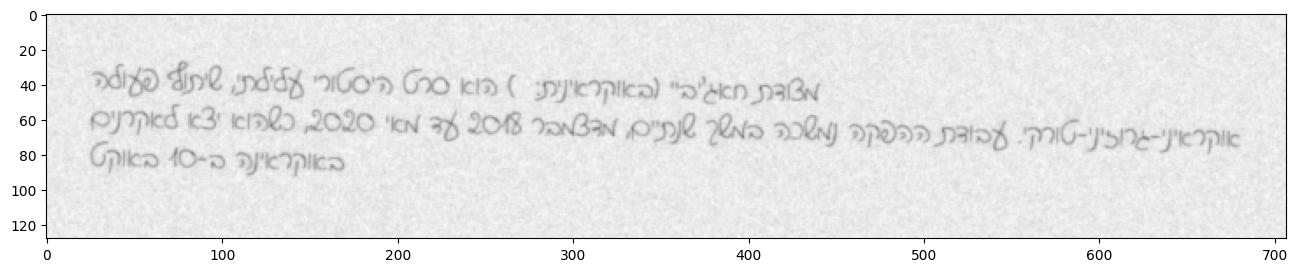

In [3]:
with open('../wiki_samples/sample_0001.txt', 'r') as f:
    data = f.read()

generator = GeneratorFromStrings(
    [data[0:200]],
    size=128,
    skewing_angle=3,
    random_skew=True,
    blur=1,
    random_blur=True,
    fonts = glob.glob('./fonts/*/*.*'),
    rtl=True, 
    language="he",
    margins=(25, 25, 25, 25),
    max_line_length=100,
)

print('generating')

counter = 0
for img, lbl in tqdm.tqdm(generator):
    if img:
        plt.figure(figsize=(16,16))
        # plt.title(get_display(lbl))
        plt.imshow(img)
        plt.show
    break

In [3]:
pip install --upgrade python-bidi

  Attempting uninstall: python-bidi
    Found existing installation: python-bidi 0.4.2
    Uninstalling python-bidi-0.4.2:
      Successfully uninstalled python-bidi-0.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
trdg 1.8.0 requires arabic-reshaper==2.1.3, but you have arabic-reshaper 3.0.0 which is incompatible.
trdg 1.8.0 requires python-bidi==0.4.2, but you have python-bidi 0.6.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [8]:
from bidi import get_display
print(lbl)

מצודת חאג'יביי (באוקראינית:  ) הוא סרט היסטורי עלילתי, שיתוף פעולה
אוקראיני-גרוזיני-טורקי. עבודת ההפקה נמשכה במשך שנתיים, מדצמבר 2018 עד מאי 2020, כשהוא יצא לאקרנים
באוקראינה ב-10 באוקט


In [4]:
from trdg import background_generator, computer_text_generator
text = "TESTING 123  אקדאןמע 123 testing בדיקה אחד שתיים שלוש"
_, mask, label = computer_text_generator.generate(
    text,
    "tests/font.ttf",
    "#010101",
    32,
    0,
    1,
    0,
    True,
    False,
)


In [24]:
label

'TESTING 123   123 testing    '

In [33]:
GeneratorFromStrings?

Init signature:
GeneratorFromStrings(
    strings: List[str],
    count: int = -1,
    fonts: List[str] = [],
    language: str = 'en',
    size: int = 32,
    skewing_angle: int = 0,
    random_skew: bool = False,
    blur: int = 0,
    random_blur: bool = False,
    background_type: int = 0,
    distorsion_type: int = 0,
    distorsion_orientation: int = 0,
    is_handwritten: bool = False,
    width: int = -1,
    alignment: int = 1,
    text_color: str = '#282828',
    orientation: int = 0,
    space_width: float = 1.0,
    character_spacing: int = 0,
    margins: Tuple[int, int, int, int] = (5, 5, 5, 5),
    fit: bool = False,
    output_mask: bool = False,
    word_split: bool = False,
    image_dir: str = '/mnt/g/ml_projects/ocr/TextRecognitionDataGenerator/trdg/generators/images',
    stroke_width: int = 0,
    stroke_fill: str = '#282828',
    image_mode: str = 'RGB',
    output_bboxes: int = 0,
    rtl: bool = False,
)
Docstring:      Generator that uses a given list of strin

In [8]:
text = "TESTING 123  אקדאןמע 123 testing בדיקה אחד שתיים שלוש"

# text = "AB汉C"
gen_strings = GeneratorFromStrings([text], count=1, fonts=["tests/font.ttf"])
img, lbl = next(gen_strings)
# assert lbl == "ABC"

# gen_dict = GeneratorFromDict(count=1, fonts=["tests/font.ttf"])
# gen_dict.generator.strings = [text]
# img, lbl = next(gen_dict)
# self.assertEqual(lbl, "ABC")

# gen_random = GeneratorFromRandom(count=1, fonts=["tests/font.ttf"])
# gen_random.generator.strings = [text]
# img, lbl = next(gen_random)
# self.assertEqual(lbl, "ABC")


In [9]:
lbl

'TESTING 123   123 testing    '

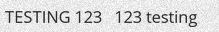

In [31]:
img

In [6]:
text = "TESTING להתראות 123  שלום 123 testing בדיקה אחד שתיים שלוש"

# text = "AB汉C"
gen_strings = GeneratorFromStrings([text], count=1, fonts=["./fonts/freefonts/aharoniclm-boldoblique-webfont.ttf"], rtl=True)
img, lbl = next(gen_strings)

In [7]:
lbl

'TESTING להתראות 123  שלום 123 testing בדיקה אחד שתיים שלוש'

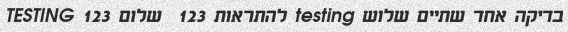

In [8]:
img